# Human Resources Department

## Downloading Database and Libraries

- Database: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset
- How to calculate salary: https://www.mom.gov.sg/employment-practices/salary/monthly-and-daily-salary e https://sprout.zendesk.com/hc/en-us/articles/360030922133-How-to-Calculate-for-the-Daily-Rate-from-Your-Monthly-Salary-
- Stock: https://www.moneyunder30.com/employee-stock-options#:~:text=Typically%20they%20are%20granted%20to,a%20specific%20period%20of%20time.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Using Pandas to read the database
employee_df = pd.read_csv('/content/Human_Resources.csv')

In [ ]:
# Shape of the table with datas
employee_df.shape

(1470, 35)

In [ ]:
# .head() shows the first 5 lines from the table
employee_df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

### The target variable here is the column "Attrition", which represents the employee’s intention to leave the company. So we will analyze the historical data of the company's employees, and through these variables, build algorithms capable of predicting whether employees will intend to leave. In this way, the company can use this data mining for decision-making, avoiding expenses and unforeseen events.

In [ ]:
# Informations from the columns (count and datatype)
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
# .describe() shows the database statistics
# We can analyse the count of rows; mean; minimum and maximum value of cells in each column; first,second and third quartile values and standard deviation (std)

employee_df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

# Data visualization





In [ ]:
# Transforming nominal variables into discrete variables

employee_df['Attrition'] = employee_df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
employee_df['OverTime'] = employee_df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)
employee_df['Over18'] = employee_df['Over18'].apply(lambda x: 1 if x == 'Y' else 0)

In [ ]:
employee_df.head()

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

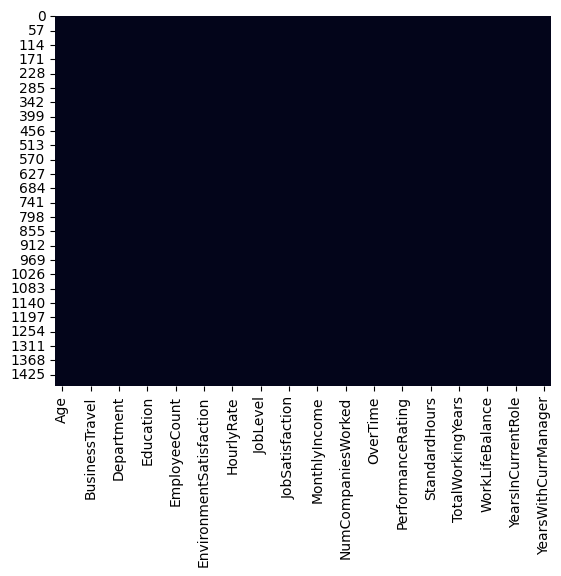

In [ ]:
# Looking for null cells
sns.heatmap(employee_df.isnull(), cbar = False);

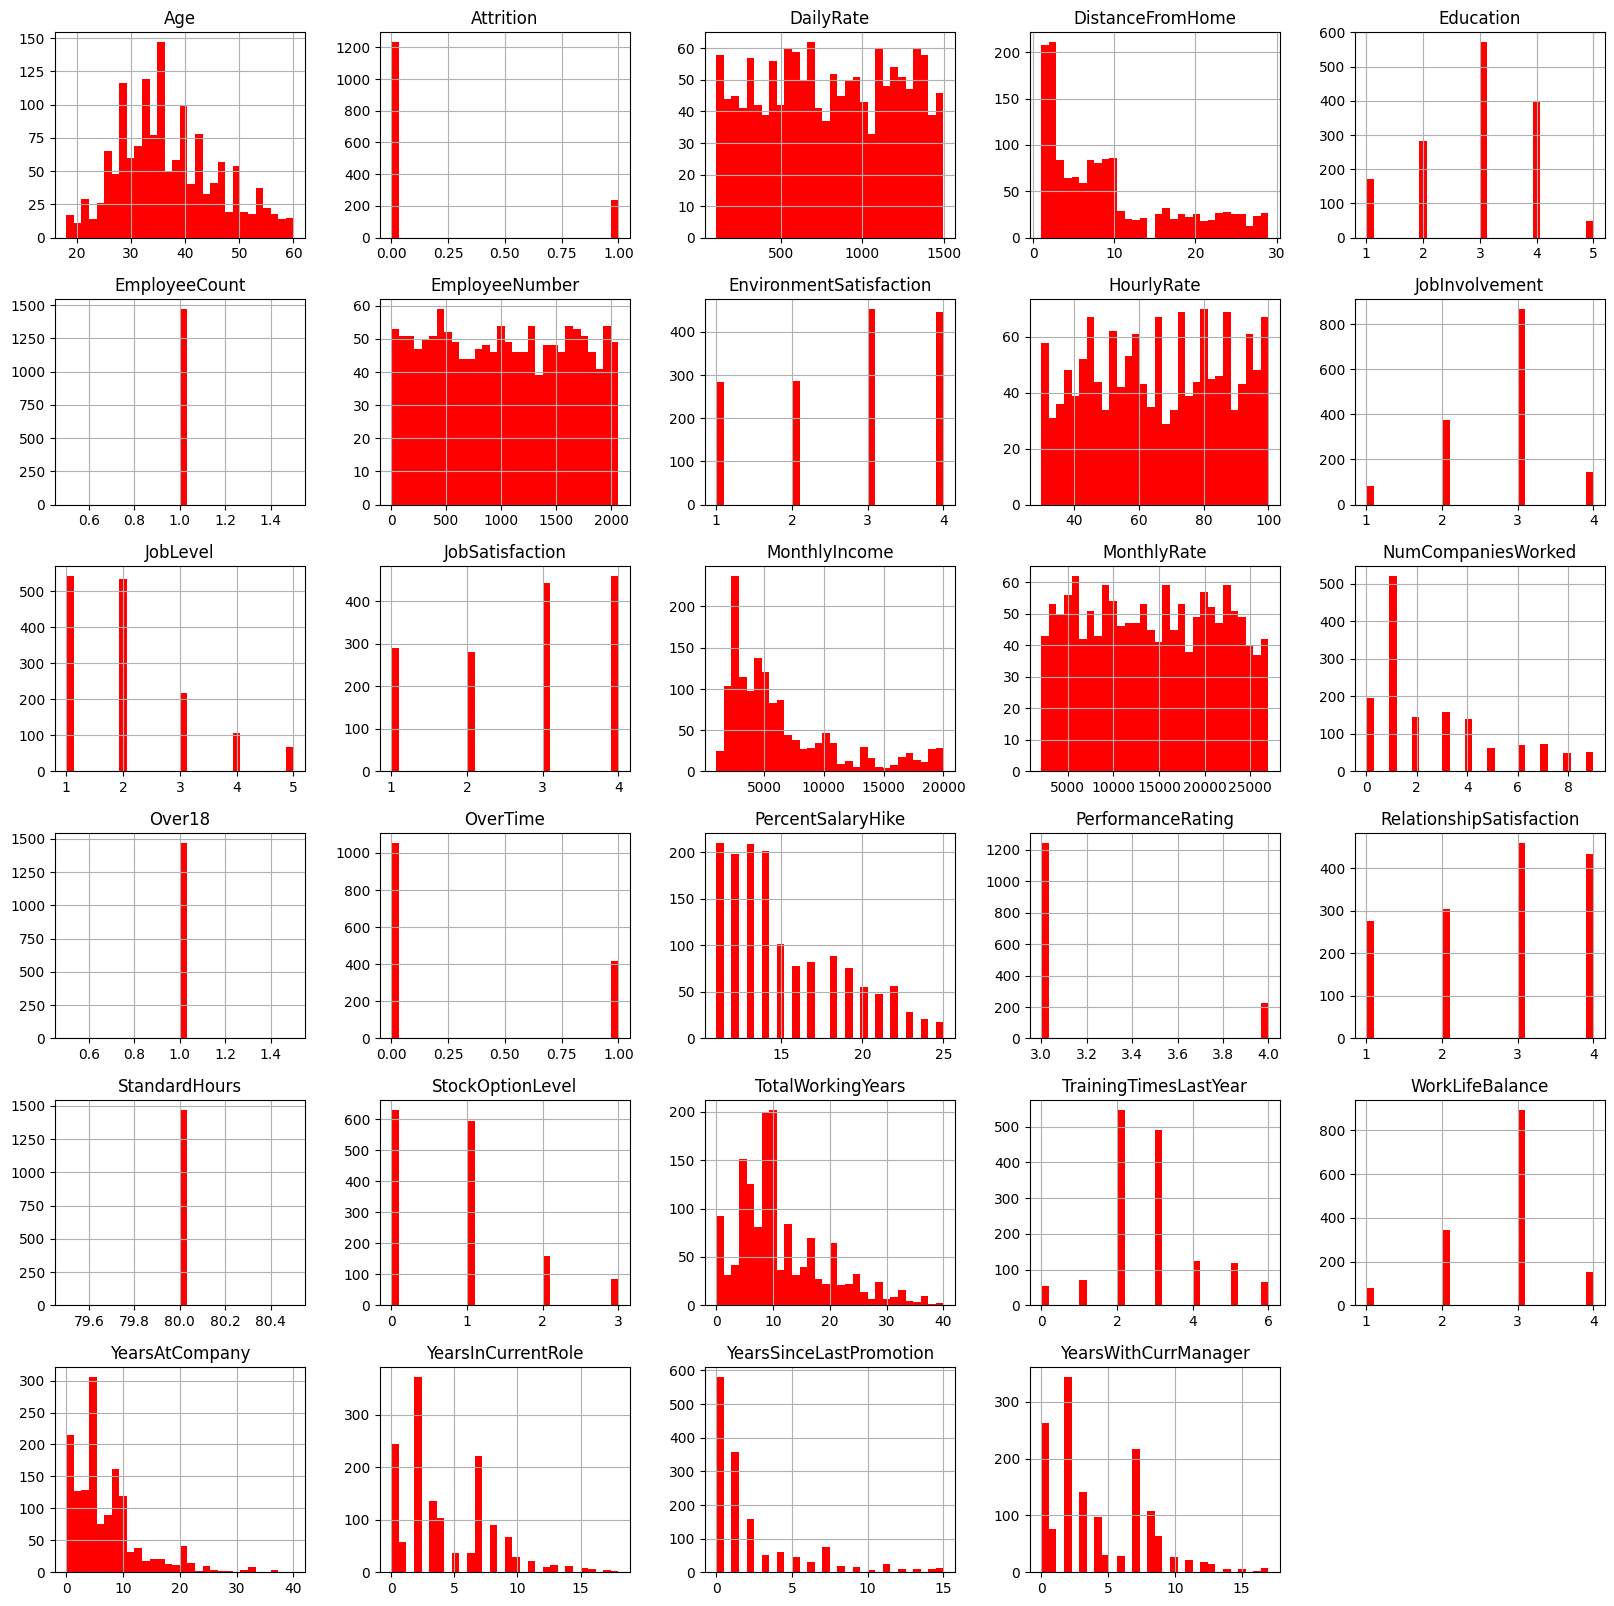

In [ ]:
# ANALYSIS FROM THE HISTOGRAMS
employee_df.hist(bins = 30, figsize=(20,20), color = 'r');

In [ ]:
# Deleting row columns that we won't use. After de histogram analysis, we can see the variables who won´t add our analysis.
# Too many columns can create overfitting problems and increase computational cost

employee_df.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis = 1, inplace=True)

In [ ]:
employee_df.head(), employee_df.shape

(   Age  Attrition     BusinessTravel  DailyRate              Department  \
 0   41          1      Travel_Rarely       1102                   Sales   
 1   49          0  Travel_Frequently        279  Research & Development   
 2   37          1      Travel_Rarely       1373  Research & Development   
 3   33          0  Travel_Frequently       1392  Research & Development   
 4   27          0      Travel_Rarely        591  Research & Development   
 
    DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
 0                 1          2  Life Sciences                        2   
 1                 8          1  Life Sciences                        3   
 2                 2          2          Other                        4   
 3                 3          4  Life Sciences                        4   
 4                 2          1        Medical                        1   
 
    Gender  ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
 0  Fema

In [ ]:
left_df = employee_df[employee_df['Attrition'] == 1]
stayed_df = employee_df[employee_df['Attrition'] == 0]

In [ ]:
print('Total = ', len(employee_df))
print('Number of employees who left the company = ', len(left_df))
print('Percentage of employees who left the company = ', (len(left_df) / len(employee_df)) * 100)
print('Number of employees who remained in the company= ', len(stayed_df))
print('Percentage of employees who stayed with the company = ', (len(stayed_df) / len(employee_df)) * 100)

In [ ]:
left_df.describe()

Age  Attrition    DailyRate  DistanceFromHome   Education  \
count  237.000000      237.0   237.000000        237.000000  237.000000   
mean    33.607595        1.0   750.362869         10.632911    2.839662   
std      9.689350        0.0   401.899519          8.452525    1.008244   
min     18.000000        1.0   103.000000          1.000000    1.000000   
25%     28.000000        1.0   408.000000          3.000000    2.000000   
50%     32.000000        1.0   699.000000          9.000000    3.000000   
75%     39.000000        1.0  1092.000000         17.000000    4.000000   
max     58.000000        1.0  1496.000000         29.000000    5.000000   

       EnvironmentSatisfaction  HourlyRate  JobInvolvement    JobLevel  \
count               237.000000  237.000000      237.000000  237.000000   
mean                  2.464135   65.573840        2.518987    1.637131   
std                   1.169791   20.099958        0.773405    0.940594   
min                   1.000000   31.000000        1.000000    1.000000   
25%                   1.000000   50.000000        2.000000    1.000000   
50%                   3.000000   66.000000        3.000000    1.000000   
75%                   4.000000   84.000000        3.000000    2.000000   
max                   4.000000  100.000000        4.000000    5.000000   

       JobSatisfaction  ...  PerformanceRating  RelationshipSatisfaction  \
count       237.000000  ...         237.000000                237.000000   
mean          2.468354  ...           3.156118                  2.599156   
std           1.118058  ...           0.363735                  1.125437   
min           1.000000  ...           3.000000                  1.000000   
25%           1.000000  ...           3.000000                  2.000000   
50%           3.000000  ...           3.000000                  3.000000   
75%           3.000000  ...           3.000000                  4.000000   
max           4.000000  ...           4.000000                  4.000000   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count        237.000000         237.000000             237.000000   
mean           0.527426           8.244726               2.624473   
std            0.856361           7.169204               1.254784   
min            0.000000           0.000000               0.000000   
25%            0.000000           3.000000               2.000000   
50%            0.000000           7.000000               2.000000   
75%            1.000000          10.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count       237.000000      237.000000          237.000000   
mean          2.658228        5.130802            2.902954   
std           0.816453        5.949984            3.174827   
min           1.000000        0.000000            0.000000   
25%           2.000000        1.000000            0.000000   
50%           3.000000        3.000000            2.000000   
75%           3.000000        7.000000            4.000000   
max           4.000000       40.000000           15.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count               237.000000            237.000000  
mean                  1.945148              2.852321  
std                   3.153077              3.143349  
min                   0.000000              0.000000  
25%                   0.000000              0.000000  
50%                   1.000000              2.000000  
75%                   2.000000              5.000000  
max                  15.000000             14.000000  

[8 rows x 25 columns]

In [ ]:
stayed_df.describe()

Age  Attrition    DailyRate  DistanceFromHome    Education  \
count  1233.000000     1233.0  1233.000000       1233.000000  1233.000000   
mean     37.561233        0.0   812.504461          8.915653     2.927007   
std       8.888360        0.0   403.208379          8.012633     1.027002   
min      18.000000        0.0   102.000000          1.000000     1.000000   
25%      31.000000        0.0   477.000000          2.000000     2.000000   
50%      36.000000        0.0   817.000000          7.000000     3.000000   
75%      43.000000        0.0  1176.000000         13.000000     4.000000   
max      60.000000        0.0  1499.000000         29.000000     5.000000   

       EnvironmentSatisfaction   HourlyRate  JobInvolvement     JobLevel  \
count              1233.000000  1233.000000     1233.000000  1233.000000   
mean                  2.771290    65.952149        2.770479     2.145985   
std                   1.071132    20.380754        0.692050     1.117933   
min                   1.000000    30.000000        1.000000     1.000000   
25%                   2.000000    48.000000        2.000000     1.000000   
50%                   3.000000    66.000000        3.000000     2.000000   
75%                   4.000000    83.000000        3.000000     3.000000   
max                   4.000000   100.000000        4.000000     5.000000   

       JobSatisfaction  ...  PerformanceRating  RelationshipSatisfaction  \
count      1233.000000  ...        1233.000000               1233.000000   
mean          2.778589  ...           3.153285                  2.733982   
std           1.093277  ...           0.360408                  1.071603   
min           1.000000  ...           3.000000                  1.000000   
25%           2.000000  ...           3.000000                  2.000000   
50%           3.000000  ...           3.000000                  3.000000   
75%           4.000000  ...           3.000000                  4.000000   
max           4.000000  ...           4.000000                  4.000000   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1233.000000        1233.000000            1233.000000   
mean           0.845093          11.862936               2.832928   
std            0.841985           7.760719               1.293585   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          16.000000               3.000000   
max            3.000000          38.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1233.000000     1233.000000         1233.000000   
mean          2.781022        7.369019            4.484185   
std           0.681907        6.096298            3.649402   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        6.000000            3.000000   
75%           3.000000       10.000000            7.000000   
max           4.000000       37.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1233.000000           1233.000000  
mean                  2.234388              4.367397  
std                   3.234762              3.594116  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 25 columns]

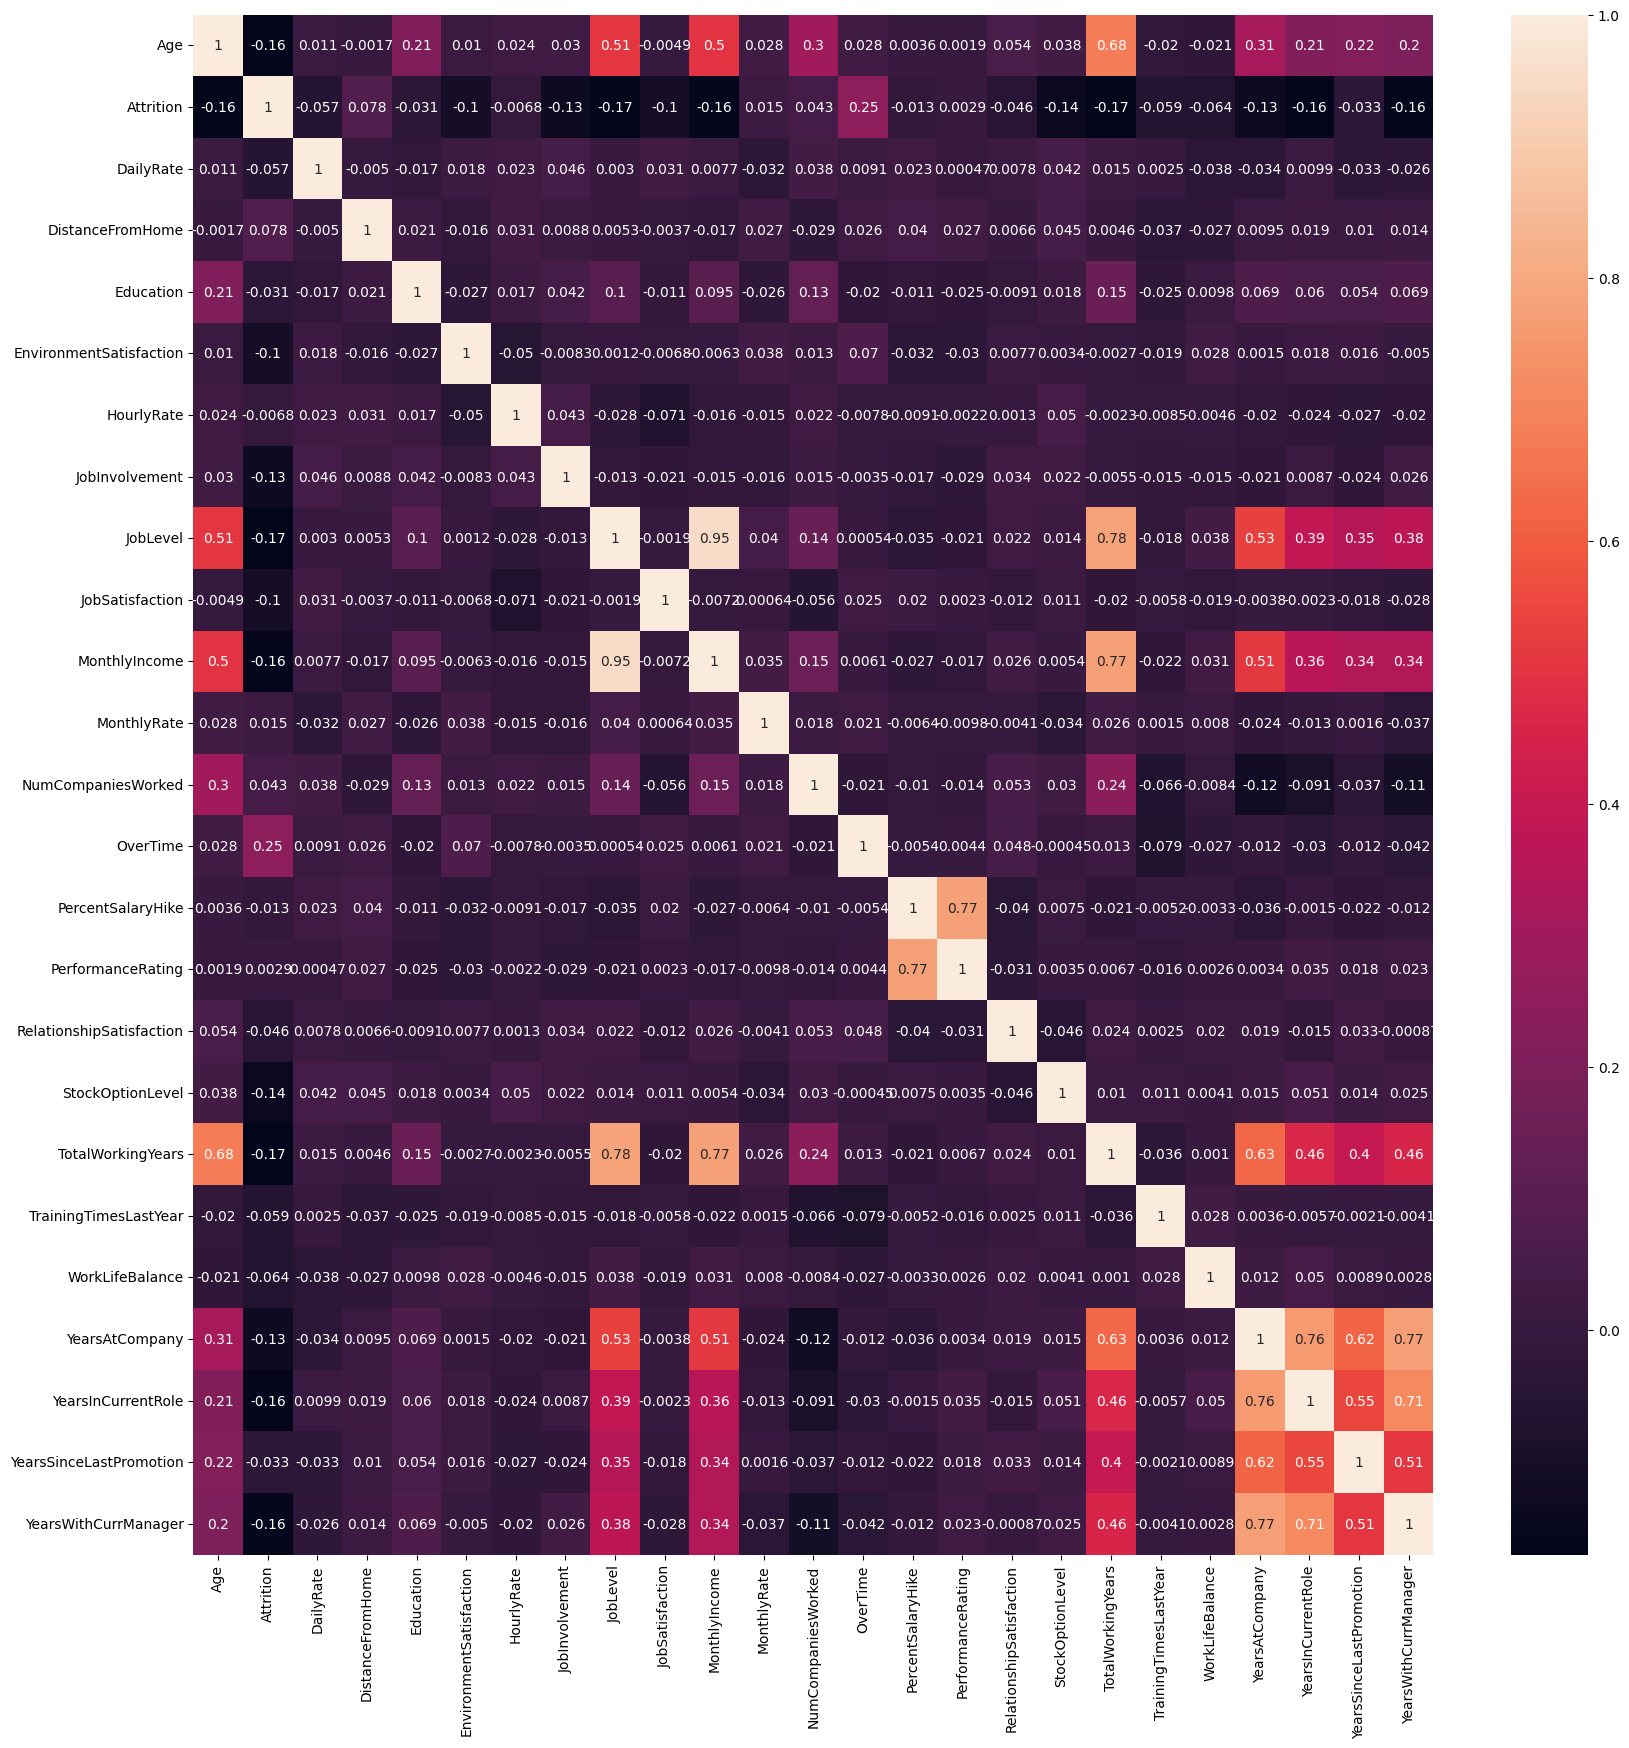

In [ ]:
# With the heatmap from Seaborn,  we can visualize the correlation between each variable represented by the columns
# Linear correlation, often measured by the Pearson correlation coefficient, quantifies the strength and direction of a linear relationship between two variables. It indicates how closely the data points cluster around a straight line when plotted on a graph.
# correlations = employee_df.corr()
correlations = employee_df.corr(numeric_only=True)
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot=True);

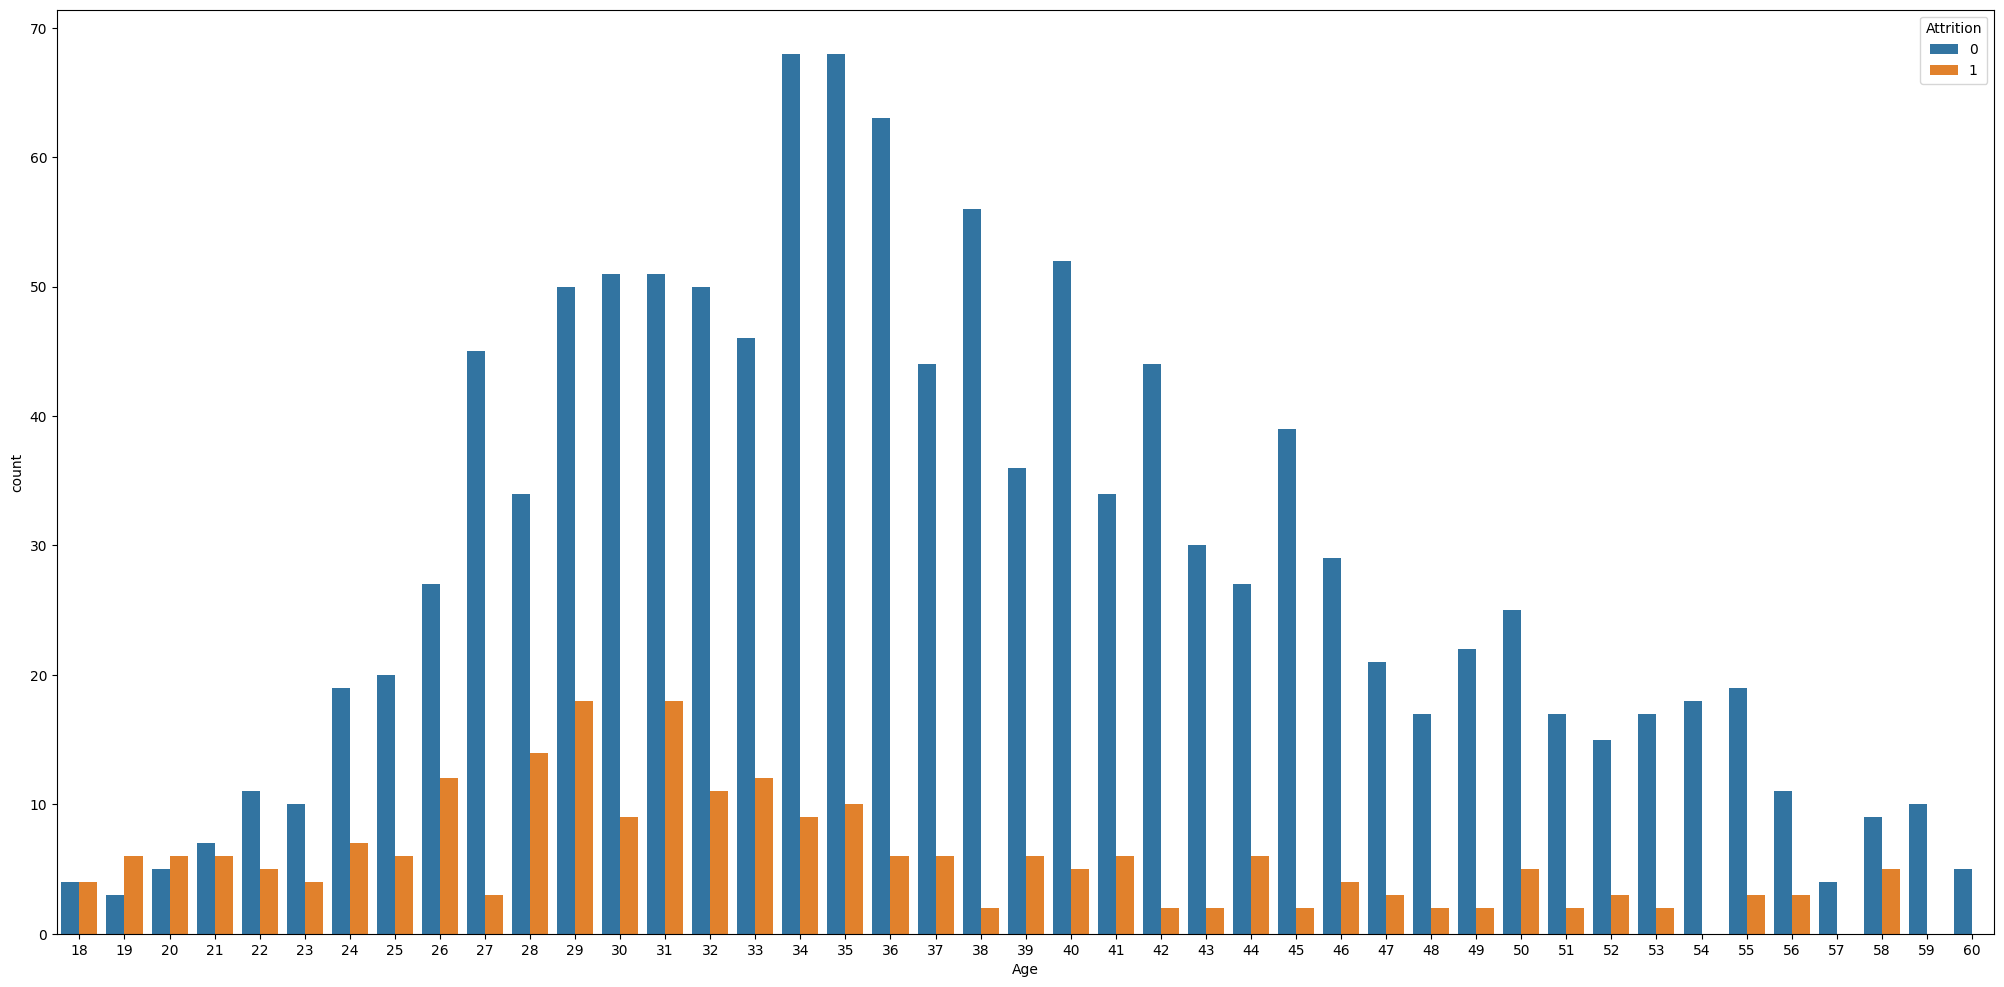

In [ ]:
# Through the Seaborn Countplot, we can see the relationship between employee age and attrition.
plt.figure(figsize=[25,12])
sns.countplot(x = 'Age', hue = 'Attrition', data=employee_df);

<Axes: xlabel='JobLevel', ylabel='count'>

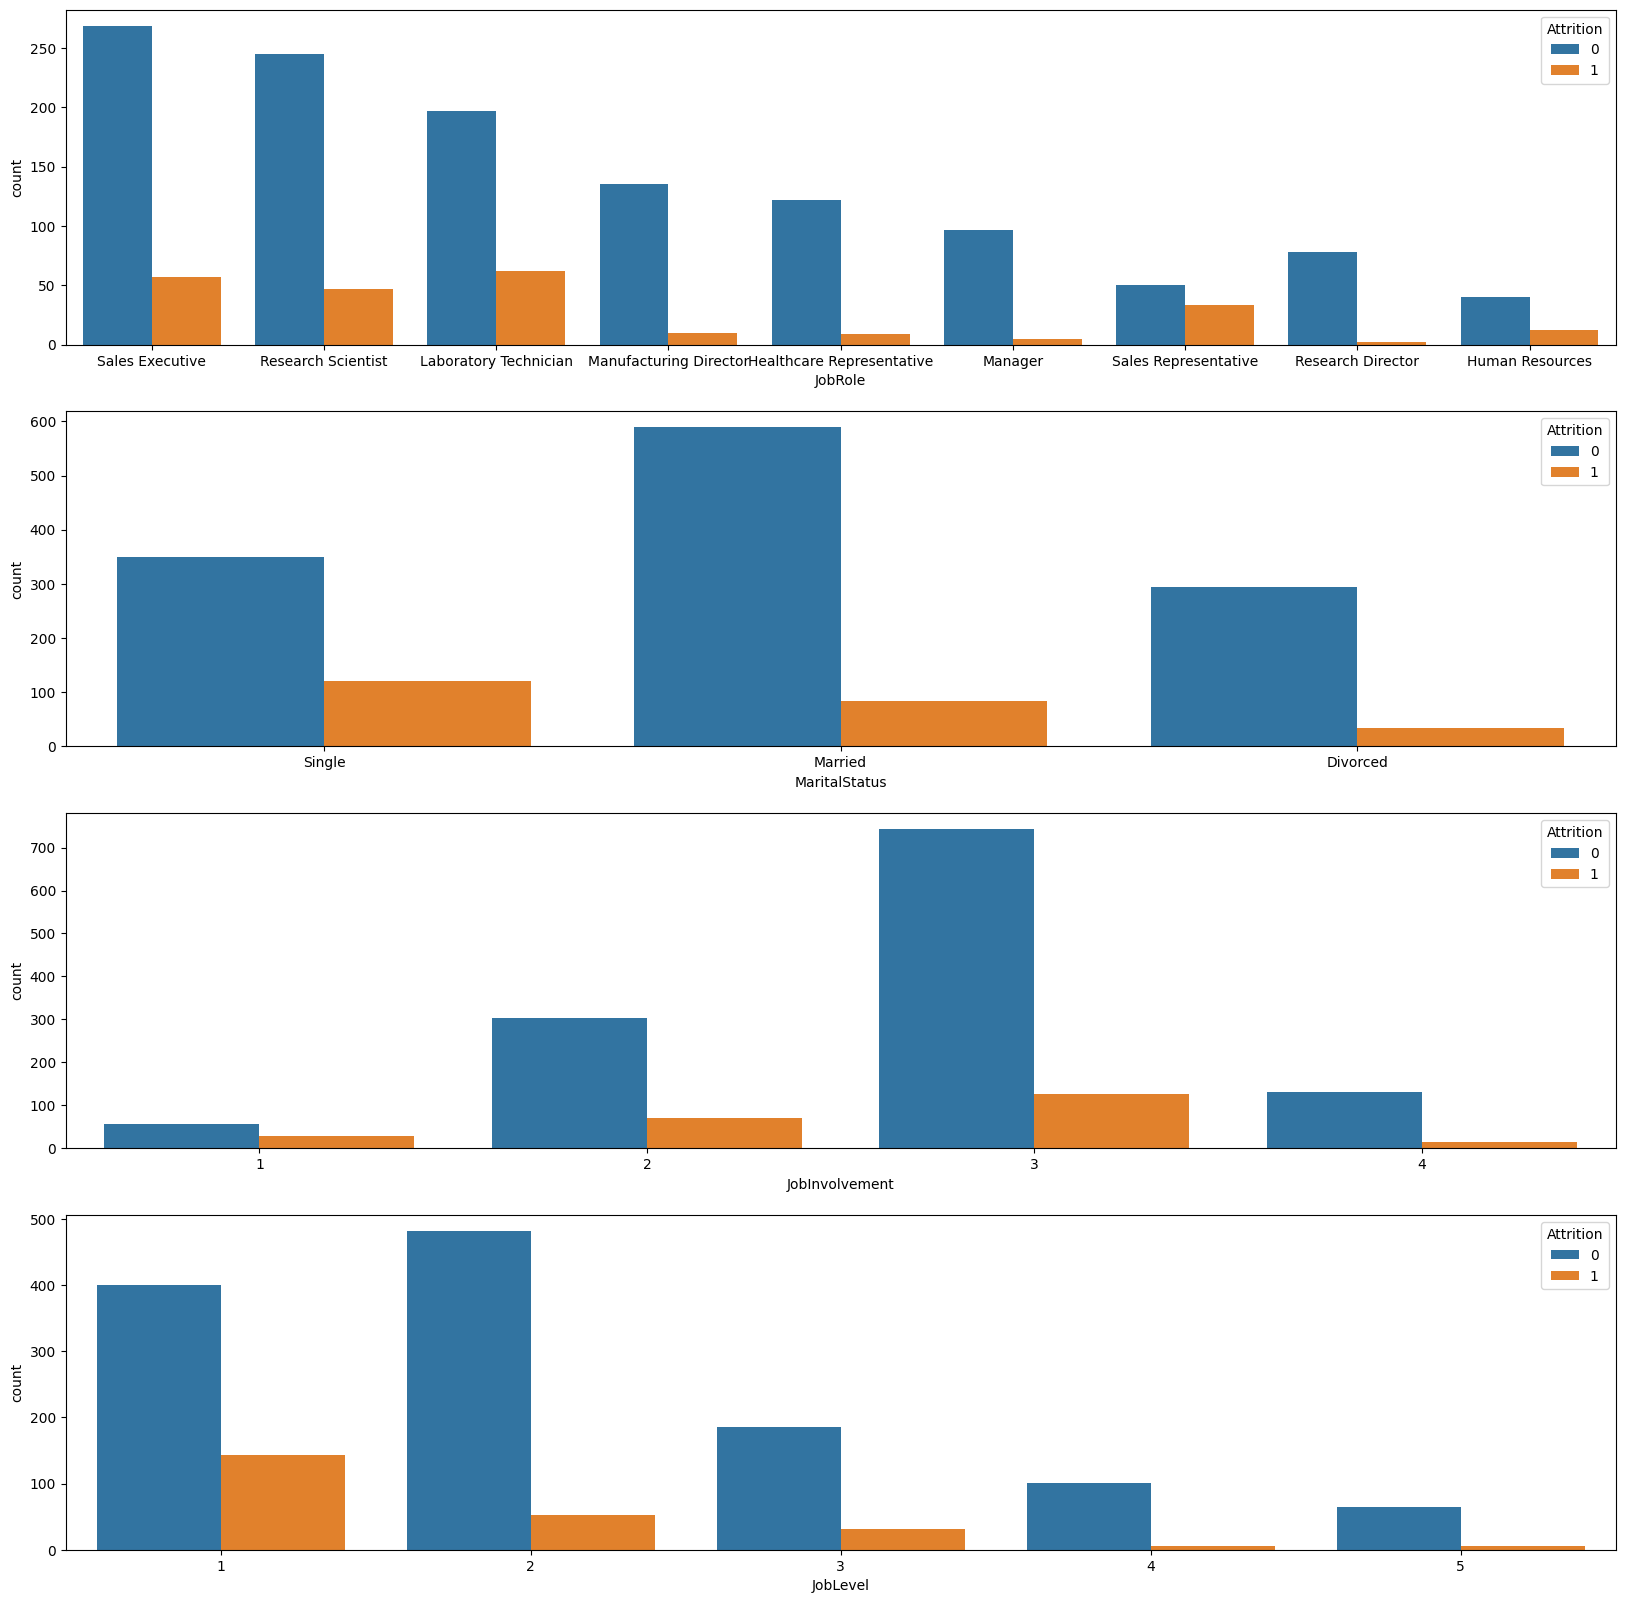

In [ ]:
plt.figure(figsize=[20,20])
plt.subplot(411)
sns.countplot(x = 'JobRole', hue = 'Attrition', data = employee_df)
plt.subplot(412)
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = employee_df)
plt.subplot(413)
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data = employee_df)
plt.subplot(414)
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = employee_df)

<ipython-input-22-7bcdc37bcf9c>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(left_df['DistanceFromHome'], label = 'Funcionários que saíram', shade = True, color = 'r')
<ipython-input-22-7bcdc37bcf9c>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(stayed_df['DistanceFromHome'], label = 'Funcionários que ficaram', shade = True, color = 'b');


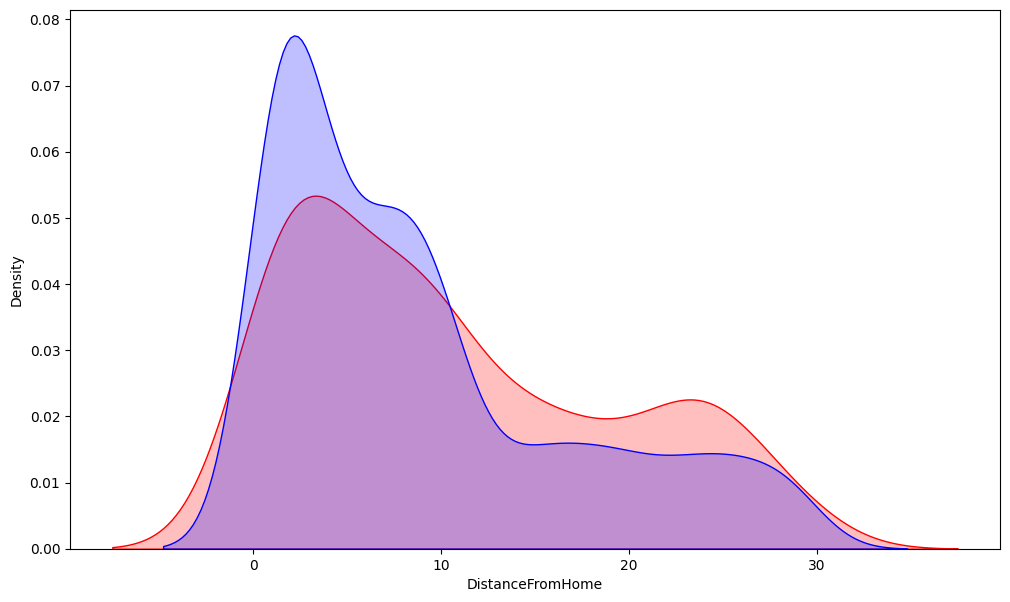

In [ ]:
# KDE (Kernel Density Estimate)
# It is a non-parametric method used to estimate the probability density function of a random variable. It essentially smooths observed data points using a kernel function to represent the density of the data at different values. KDE is useful for visualizing data distributions, generating simulated data points, and powering simulations based on real data
plt.figure(figsize=(12,7))
sns.kdeplot(left_df['DistanceFromHome'], label = 'Funcionários que saíram', shade = True, color = 'r')
sns.kdeplot(stayed_df['DistanceFromHome'], label = 'Funcionários que ficaram', shade = True, color = 'b');

<ipython-input-23-43c85e6655e8>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(left_df['TotalWorkingYears'], label = 'Funcionários que saíram', shade = True, color = 'r')
<ipython-input-23-43c85e6655e8>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(stayed_df['TotalWorkingYears'], label = 'Funcionários que ficaram', shade = True, color = 'b');


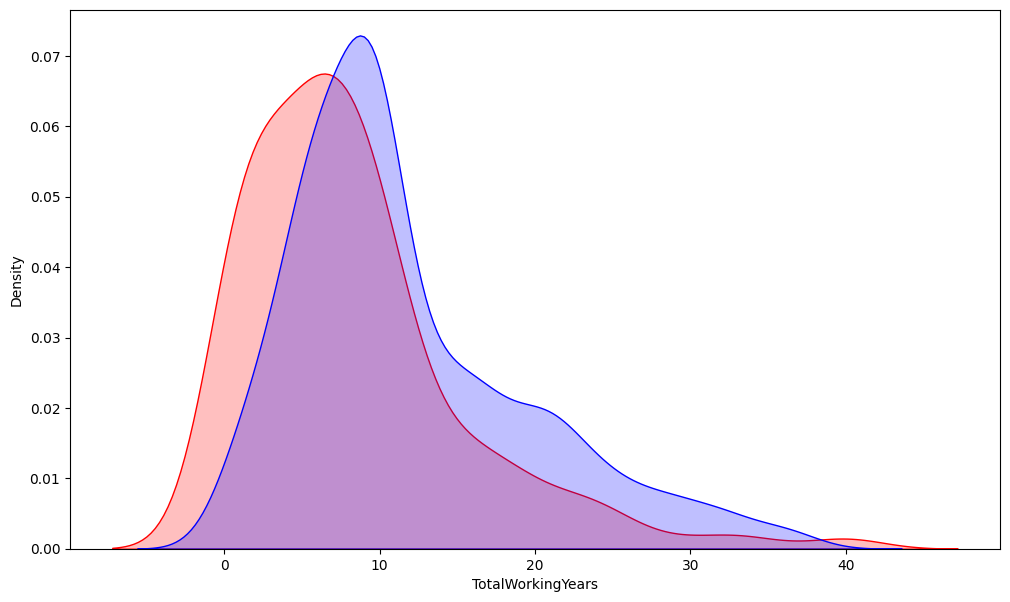

In [ ]:
plt.figure(figsize=(12,7))
sns.kdeplot(left_df['TotalWorkingYears'], label = 'Funcionários que saíram', shade = True, color = 'r')
sns.kdeplot(stayed_df['TotalWorkingYears'], label = 'Funcionários que ficaram', shade = True, color = 'b');

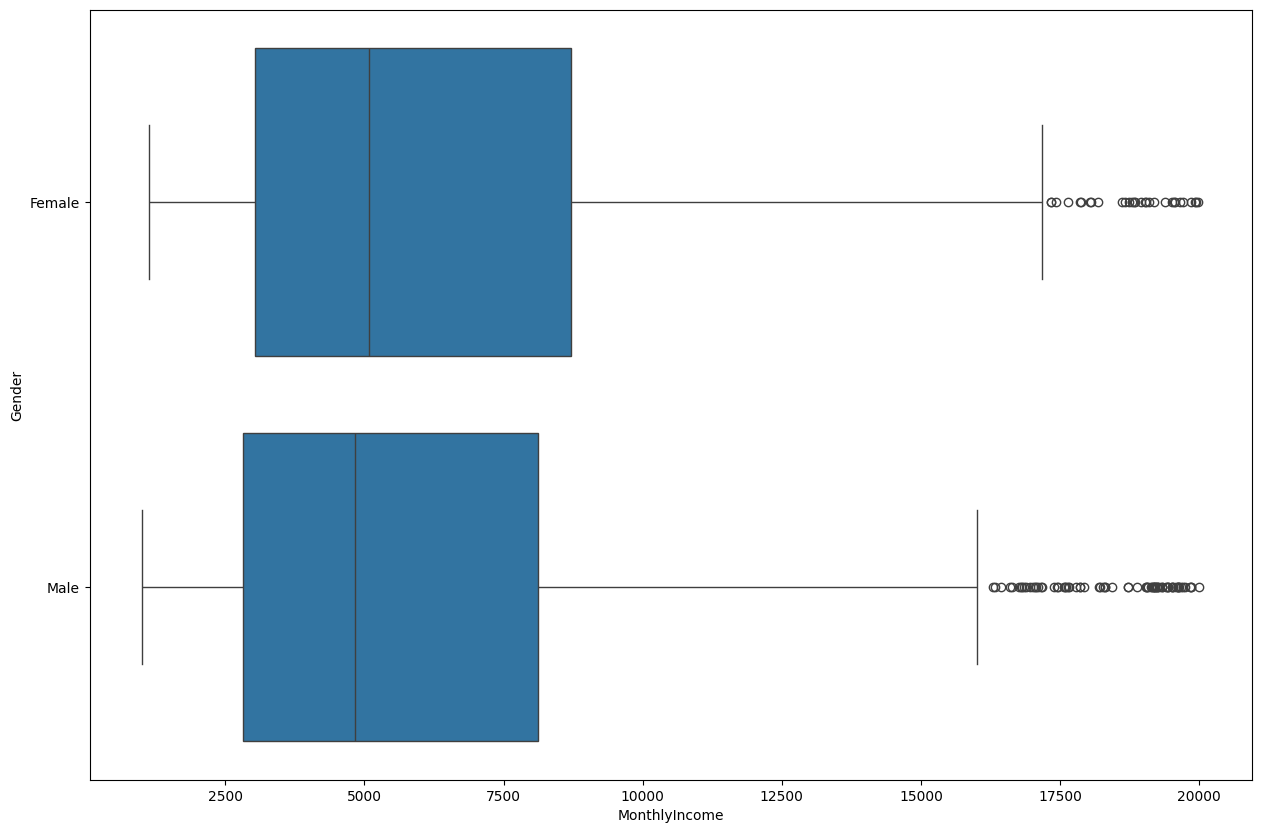

In [ ]:
# Seaborn Boxplot shows this graphic for quartiles analisys. We can clearly see the distribution of attributes and whether some of them may be outliers
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'Gender', data=employee_df);

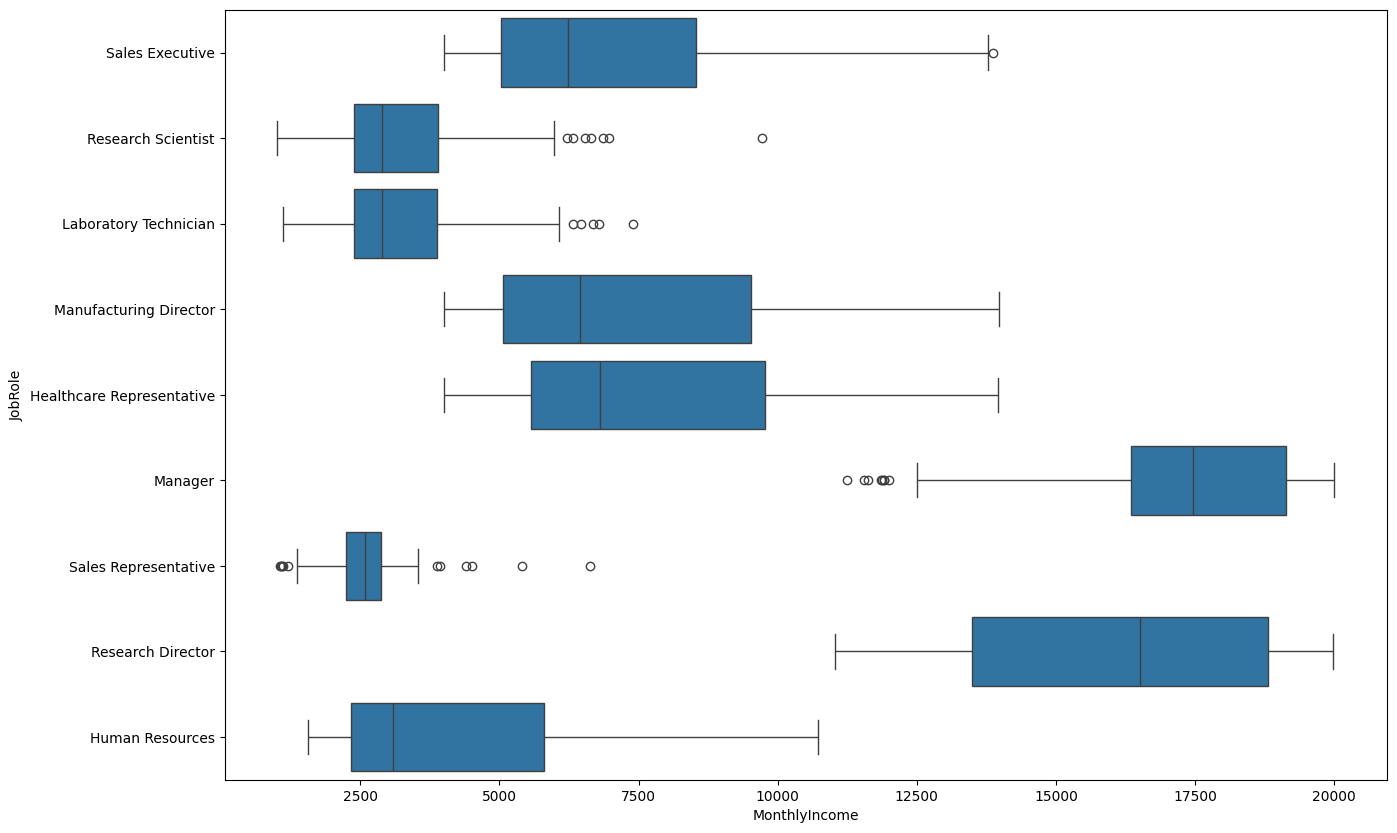

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'JobRole', data=employee_df);

## Pré-processamento e bases de treinamento/teste

In [ ]:
employee_df.head()

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0  Female  ...                  3                         1                 0   
1    Male  ...                  4                         4                 1   
2    Male  ...                  3                         2                 0   
3  Female  ...                  3                         3                 0   
4    Male  ...                  3                         4                 1   

  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 8                      0               1               6   
1                10                      3               3              10   
2                 7                      3               3               0   
3                 8                      3               3               8   
4                 6                      3               3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  

[5 rows x 31 columns]

In [ ]:
# Nominal variables to be transformed into discrete ones

X_cat = employee_df[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]
X_cat

BusinessTravel              Department EducationField  Gender  \
0         Travel_Rarely                   Sales  Life Sciences  Female   
1     Travel_Frequently  Research & Development  Life Sciences    Male   
2         Travel_Rarely  Research & Development          Other    Male   
3     Travel_Frequently  Research & Development  Life Sciences  Female   
4         Travel_Rarely  Research & Development        Medical    Male   
...                 ...                     ...            ...     ...   
1465  Travel_Frequently  Research & Development        Medical    Male   
1466      Travel_Rarely  Research & Development        Medical    Male   
1467      Travel_Rarely  Research & Development  Life Sciences    Male   
1468  Travel_Frequently                   Sales        Medical    Male   
1469      Travel_Rarely  Research & Development        Medical    Male   

                        JobRole MaritalStatus  
0               Sales Executive        Single  
1            Research Scientist       Married  
2         Laboratory Technician        Single  
3            Research Scientist       Married  
4         Laboratory Technician       Married  
...                         ...           ...  
1465      Laboratory Technician       Married  
1466  Healthcare Representative       Married  
1467     Manufacturing Director       Married  
1468            Sales Executive       Married  
1469      Laboratory Technician       Married  

[1470 rows x 6 columns]

In [ ]:

# One Hot Encoding is a method for converting categorical variables into binary format. It creates new columns for each category, where 1 means the category is present and 0 means it is not.
# We must transform the selected columns to array to use OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()

In [ ]:
X_cat.shape

(1470, 26)

In [ ]:
type(X_cat)

numpy.ndarray

In [ ]:
# Now the variables must be transformed again for database dtype
X_cat = pd.DataFrame(X_cat)
type(X_cat)

pandas.core.frame.DataFrame

In [ ]:
employee_df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [ ]:
X_cat

0    1    2    3    4    5    6    7    8    9   ...   16   17   18  \
0     0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0   
1     0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0   
2     0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   
3     0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0   
4     0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  1.0  0.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1465  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  1.0  0.0  0.0   
1466  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   
1467  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  1.0   
1468  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   
1469  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  1.0  0.0  0.0   

       19   20   21   22   23   24   25  
0     0.0  0.0  1.0  0.0  0.0  0.0  1.0  
1     0.0  1.0  0.0  0.0  0.0  1.0  0.0  
2     0.0  0.0  0.0  0.0  0.0  0.0  1.0  
3     0.0  1.0  0.0  0.0  0.0  1.0  0.0  
4     0.0  0.0  0.0  0.0  0.0  1.0  0.0  
...   ...  ...  ...  ...  ...  ...  ...  
1465  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
1466  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
1467  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
1468  0.0  0.0  1.0  0.0  0.0  1.0  0.0  
1469  0.0  0.0  0.0  0.0  0.0  1.0  0.0  

[1470 rows x 26 columns]

In [ ]:
X_numerical = employee_df[['Age', 'DailyRate', 'DistanceFromHome',	'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',	'JobLevel',	'JobSatisfaction',	'MonthlyIncome',	'MonthlyRate',	'NumCompaniesWorked',	'OverTime',	'PercentSalaryHike', 'PerformanceRating',	'RelationshipSatisfaction',	'StockOptionLevel',	'TotalWorkingYears'	,'TrainingTimesLastYear'	, 'WorkLifeBalance',	'YearsAtCompany'	,'YearsInCurrentRole', 'YearsSinceLastPromotion',	'YearsWithCurrManager']]
X_numerical

Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0      41       1102                 1          2                        2   
1      49        279                 8          1                        3   
2      37       1373                 2          2                        4   
3      33       1392                 3          4                        4   
4      27        591                 2          1                        1   
...   ...        ...               ...        ...                      ...   
1465   36        884                23          2                        3   
1466   39        613                 6          1                        4   
1467   27        155                 4          3                        2   
1468   49       1023                 2          3                        4   
1469   34        628                 8          3                        2   

      HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  \
0             94               3         2                4           5993   
1             61               2         2                2           5130   
2             92               2         1                3           2090   
3             56               3         1                3           2909   
4             40               3         1                2           3468   
...          ...             ...       ...              ...            ...   
1465          41               4         2                4           2571   
1466          42               2         3                1           9991   
1467          87               4         2                2           6142   
1468          63               2         2                2           5390   
1469          82               4         2                3           4404   

      ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0     ...                  3                         1                 0   
1     ...                  4                         4                 1   
2     ...                  3                         2                 0   
3     ...                  3                         3                 0   
4     ...                  3                         4                 1   
...   ...                ...                       ...               ...   
1465  ...                  3                         3                 1   
1466  ...                  3                         1                 1   
1467  ...                  4                         2                 1   
1468  ...                  3                         4                 0   
1469  ...                  3                         1                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                     8                      0                1   
1                    10                      3                3   
2                     7                      3                3   
3                     8                      3                3   
4                     6                      3                3   
...                 ...                    ...              ...   
1465                 17                      3                3   
1466                  9                      5                3   
1467                  6                      0                3   
1468                 17                      3                2   
1469                  6                      3                4   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                  6                   4                        0   
1                 10                   7                        1   
2                  0                   0                        0   
3                  8                   7                        3   
4                  2                   2                        2   


### One Hot Encoder Documentation
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [ ]:
#Concatenating the discrete variables with the table above transformed by one hot encoding (pandas resource)
X_all = pd.concat([X_cat, X_numerical], axis = 1)
X_all.columns = X_all.columns.astype(str)
X_all

0    1    2    3    4    5    6    7    8    9  ...  \
0     0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  ...   
1     0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  ...   
2     0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...   
3     0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  ...   
4     0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1465  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...   
1466  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...   
1467  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  ...   
1468  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  ...   
1469  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...   

      PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                     3                         1                 0   
1                     4                         4                 1   
2                     3                         2                 0   
3                     3                         3                 0   
4                     3                         4                 1   
...                 ...                       ...               ...   
1465                  3                         3                 1   
1466                  3                         1                 1   
1467                  4                         2                 1   
1468                  3                         4                 0   
1469                  3                         1                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                     8                      0                1   
1                    10                      3                3   
2                     7                      3                3   
3                     8                      3                3   
4                     6                      3                3   
...                 ...                    ...              ...   
1465                 17                      3                3   
1466                  9                      5                3   
1467                  6                      0                3   
1468                 17                      3                2   
1469                  6                      3                4   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                  6                   4                        0   
1                 10                   7                        1   
2                  0                   0                        0   
3                  8                   7                        3   
4                  2                   2                        2   
...              ...                 ...                      ...   
1465               5                   2                        0   
1466               7                   7                        1   
1467               6                   2                        0   
1468               9                   6                        0   
1469               4                   3                        1   

      YearsWithCurrManager  
0                        5  
1                        7  
2                        0  
3                        0  
4                        2  
...                    ...  
1465                     3  
1466                     7  
1467                     3  
1468                     8  
1469                     2  

[1470 rows x 50 columns]

### MinMaxScaler Documentation
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [ ]:
# The function MinMaxScaler, from SkLearn is used to It is used to standardize the value of variables, using the standard deviation to prevent large attribute values ​​from influencing the weight of variables.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_all)

In [ ]:
X

array([[0.        , 0.        , 1.        , ..., 0.22222222, 0.        ,
        0.29411765],
       [0.        , 1.        , 0.        , ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.11111111, 0.        ,
        0.17647059],
       [0.        , 1.        , 0.        , ..., 0.33333333, 0.        ,
        0.47058824],
       [0.        , 0.        , 1.        , ..., 0.16666667, 0.06666667,
        0.11764706]])

In [ ]:
# target variable
y = employee_df['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [ ]:
# Separating the database to use the algorithms for prediction (test and training) using train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
X_train.shape, y_train

((1102, 50),
 858     0
 780     1
 772     0
 753     0
 805     0
        ..
 1180    0
 1232    0
 751     0
 715     0
 735     0
 Name: Attrition, Length: 1102, dtype: int64)

In [ ]:
X_test.shape, y_test

((368, 50),
 1462    0
 1086    0
 1192    0
 1220    0
 1332    1
        ..
 195     0
 86      0
 1244    0
 268     0
 341     0
 Name: Attrition, Length: 368, dtype: int64)

## Regressão logística


Logistic regression is a supervised machine learning algorithm used for binary (where there are two possible classes) or multiclass (where there are more than two classes) classification problems. It predicts the probability of an event occurring by fitting the data to a logistic (sigmoid) function.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = logistic.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [ ]:
y_test

1462    0
1086    0
1192    0
1220    0
1332    1
       ..
195     0
86      0
1244    0
268     0
341     0
Name: Attrition, Length: 368, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score

The accuracy score is a metric used in machine learning to evaluate how often a model's predictions are correct. It's calculated by dividing the number of correct predictions by the total number of predictions

In [ ]:

accuracy_score(y_test, y_pred)

0.8994565217391305

A confusion matrix is ​​a tool used to evaluate the performance of classification models in machine learning. It summarizes the number of correct and incorrect predictions relative to the actual classes. It is a table that shows the relationship between the model's predictions and the actual values, allowing the identification of patterns of errors and successes.

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[305,   3],
       [ 34,  26]])

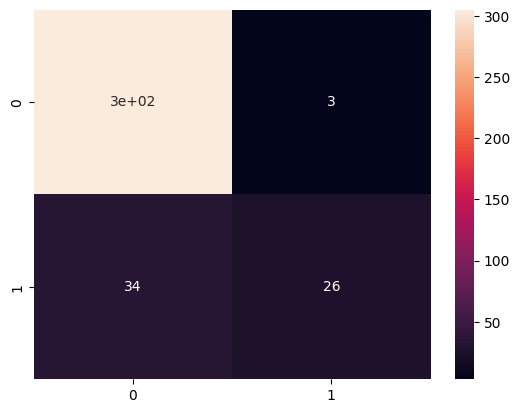

In [ ]:
sns.heatmap(cm, annot=True);

In [ ]:
# Precision
23 / (23 + 3)

0.8846153846153846

In [ ]:
# Recall
23 / (23 + 43)

0.3484848484848485

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

In [ ]:
precision_score(y_test, y_pred)

0.896551724137931

In [ ]:
recall_score(y_test, y_pred)

0.43333333333333335

In [ ]:
f1_score(y_test, y_pred, average='macro')

0.7635413229599013

- Precision: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
- Recall: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html
- F1: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       308
           1       0.90      0.43      0.58        60

    accuracy                           0.90       368
   macro avg       0.90      0.71      0.76       368
weighted avg       0.90      0.90      0.88       368



## Random forest

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. Trees in the forest use the best split strategy, i.e. equivalent to passing splitter="best" to the underlying DecisionTreeClassifier.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = forest.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
accuracy_score(y_test, y_pred)

0.8559782608695652

In [ ]:
cm = confusion_matrix(y_pred, y_test)
cm

array([[306,  51],
       [  2,   9]])

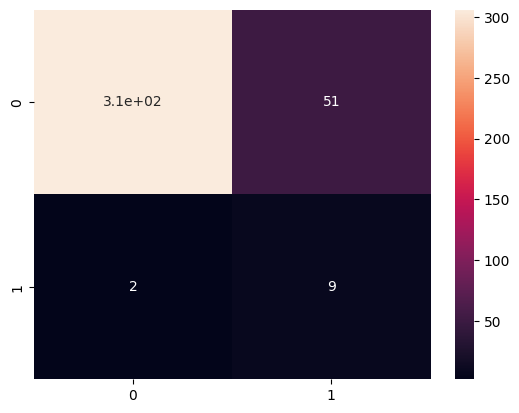

In [ ]:
sns.heatmap(cm, annot=True);

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       308
           1       0.82      0.15      0.25        60

    accuracy                           0.86       368
   macro avg       0.84      0.57      0.59       368
weighted avg       0.85      0.86      0.81       368



## Artificial Neural Networks
https://scikit-learn.org/stable/api/sklearn.neural_network.html

Artificial neural networks are AI algorithms that use the shape and communication of neurons as their structure.I will create another repository to discuss this algorithm

In [ ]:
# We are going to use Tensorflow Keras to create the layers and constructe the Neural Network
import tensorflow as tf

In [ ]:
X_train.shape

(1102, 50)

In [ ]:
(50 + 1) / 2

25.5

In [ ]:
# In this structure, will be 4  dense layers, using the activation functions 'relu'  and 'sigmoid'
rede_neural = tf.keras.models.Sequential()
rede_neural.add(tf.keras.layers.Dense(units = 25, activation='relu', input_shape=(50,)))
rede_neural.add(tf.keras.layers.Dense(units = 25, activation = 'relu'))
rede_neural.add(tf.keras.layers.Dense(units = 25, activation = 'relu'))
rede_neural.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
rede_neural.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 25)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,601 (10.16 KB)

 Trainable params: 2,601 (10.16 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Using this configuratiion for the hyperparameters
rede_neural.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Training this NN for 200 epochs
rede_neural.fit(X_train, y_train, epochs=200)

Epoch 1/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7675 - loss: 0.5999
Epoch 2/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8463 - loss: 0.4123
Epoch 3/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8243 - loss: 0.4158
Epoch 4/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8584 - loss: 0.3381 
Epoch 5/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8378 - loss: 0.3748 
Epoch 6/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8532 - loss: 0.3400
Epoch 7/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8742 - loss: 0.3339
Epoch 8/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8723 - loss: 0.2990
Epoch 9/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8859 - loss: 0.2993 
Epoch 10/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8648 - loss: 0.3172
Epoch 11/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8904 - loss: 0.3032 
Epoch 12/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accur

In [ ]:
# Predictions
y_pred = rede_neural.predict(X_test)
y_pred

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


array([[2.90421218e-01],
       [1.62785341e-09],
       [3.75207871e-01],
       [3.45074292e-03],
       [1.00000000e+00],
       [1.87047905e-10],
       [3.44490027e-11],
       [1.81313232e-01],
       [2.74194172e-04],
       [9.41122198e-05],
       [1.05307485e-07],
       [4.14666283e-05],
       [6.10170581e-09],
       [1.92519264e-10],
       [1.07597355e-10],
       [1.00000000e+00],
       [2.12348241e-05],
       [1.30176312e-11],
       [2.40304729e-07],
       [1.00000000e+00],
       [9.99987543e-01],
       [5.62450052e-20],
       [4.44653736e-09],
       [8.03304357e-25],
       [1.00629344e-18],
       [1.12615889e-15],
       [2.64550022e-06],
       [2.49562561e-07],
       [1.78584841e-10],
       [6.72392035e-03],
       [6.00240128e-06],
       [4.25322991e-20],
       [1.00000000e+00],
       [9.99998033e-01],
       [1.15337654e-20],
       [9.97712314e-01],
       [1.34088929e-11],
       [1.00000000e+00],
       [3.86136179e-07],
       [6.14159248e-08],


In [ ]:
# Getting the binary values
y_pred = (y_pred >= 0.5)
y_pred

array([[False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[289,  19],
       [ 35,  25]])

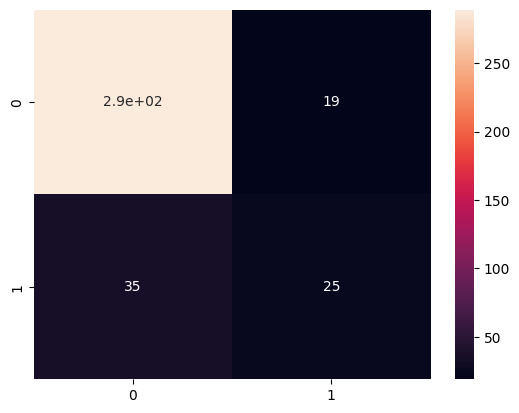

In [ ]:
sns.heatmap(cm, annot=True);

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       308
           1       0.57      0.42      0.48        60

    accuracy                           0.85       368
   macro avg       0.73      0.68      0.70       368
weighted avg       0.84      0.85      0.84       368

